## Gradient Boosting

- Gradient Boosting is a powerful boosting algorithm that combines several weak learners into strong learners, in which each new model is trained to minimize the loss function such as mean squared error or cross-entropy of the previous model using gradient descent.

- The main idea behind this algorithm is to build models sequentially and these subsequent models try to reduce the errors of the previous model. How do we reduce the error? This is done by building a new model on the errors or residuals of the previous model.

In [1]:
# Gradient Boosting

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# AdaBoost
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# XGBoost
import xgboost as xgb

# CatBoost
import catboost as cb

In [2]:
# Generate synthetic dataset with a linear relationship
np.random.seed(42)
X = np.random.rand(200, 1) * 10
y = 2 * X[:, 0] + np.random.randn(200) * 2

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Fit the gradient boosting regressor to the training data
n_estimators = 100
learning_rate = 0.1
max_depth = 3

model = GradientBoostingRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.79747729726366


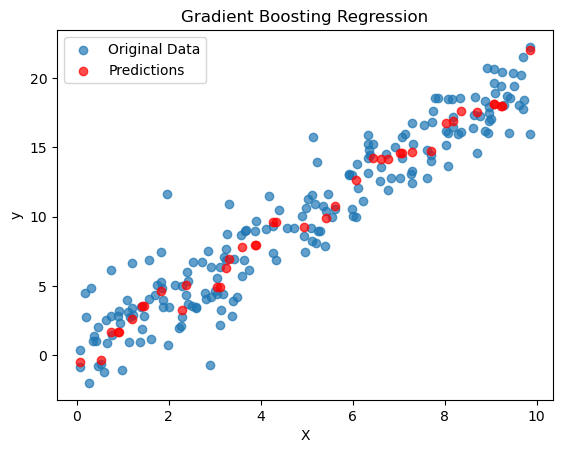

In [5]:
# Plot the data and the fitted model
plt.scatter(X, y, alpha=0.7, label="Original Data")
plt.scatter(X_test, y_pred, color='red', alpha=0.7, label="Predictions")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Gradient Boosting Regression")
plt.show()

#### Interpretation

- The MSE value gives us an idea of how well our gradient boosting regressor is performing on the test dataset. The lower the MSE, the better the model's performance.

- An MSE of 4.79 means that, on average, the squared difference between the predicted and actual target values is 4.79. Since we added random noise to the data during its generation, the MSE value being slightly above zero is expected.
When evaluating different models or tuning hyperparameters, you would typically compare the MSE values to choose the best-performing model.

- For instance, if you had another model that produced an MSE of 5.5 on the same dataset, you would prefer the current model with an MSE of 4.79 because it has a lower error.

- It's essential to remember the scale of the target variable when interpreting the MSE. In this example, the target variable was generated with a linear relationship, so the MSE may not be directly applicable to real-world datasets with different characteristics.

## Examples

Best model is XGBoost for possum age prediction regression task.

XGBoost Model Mean Squared Error: 2.77

### AdaBoost, XGBoost and CatBoost Differences

- Gradient Boosting: AdaBoost, XGBoost and CatBoost are gradient boosting algorithms. They build consecutive weak learners while focusing on the errors of previous learners. XGBoost is optimized for speed and efficiency, particularly on low-dimensional datasets. It is highly customizable and performs well.

- Categorical Variables: CatBoost is the only algorithm that directly handles categorical variables without requiring additional preprocessing. Other algorithms may need extra steps to process categorical features.

- Scaling: XGBoost and AdaBoost require data scaling to put features on similar scales, but CatBoost is less sensitive to scaling and can work with unscaled data more effectively.

- Speed and Memory Usage: Each algorithm varies in terms of speed and memory usage. XGBoost is highly efficient and optimized, while CatBoost might use more memory, especially with categorical features. AdaBoost can be faster when using weaker learners.

- Overfitting Sensitivity: These algorithms show different levels of sensitivity to overfitting. AdaBoost may have a higher tendency to overfit with small datasets. CatBoost handles categorical variables automatically and employs a better regularization strategy, making it more resistant to overfitting.

### AdaBoost

AdaBoost is an ensemble learning technique that sequentially trains weak learners on weighted subsets of the training data, emphasizing misclassified samples in each iteration to build a strong learner. It combines the predictions of these weak learners using weighted voting to create a robust model with improved performance in classification and regression tasks.

In [6]:
# Read data from csv
df = pd.read_csv("assets/possum.csv")

# Drop rows with NaN values
df.dropna(inplace=True)

# Drop the "pop" column from the DataFrame
df.drop("Pop", axis=1, inplace=True)

# Define a mapping dictionary for encoding "sex" column
sex_mapping = {"m": 0, "f": 1}

# Use the map function to apply the encoding to the "sex" column
df["sex"] = df["sex"].map(sex_mapping)

In [7]:
# Extracting features (X) and target variable (y) from the DataFrame 'df'
X = df.drop(columns=["age"])  # Features
y = df["age"]  # Target variable

# Splitting the data into training and testing sets with 80% for training and 20% for testing
# The random_state is set to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating an AdaBoostRegressor model with 50 base estimators (weak learners)
# The random_state is set to 42 for reproducibility
adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Training the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 3.0415313795630956


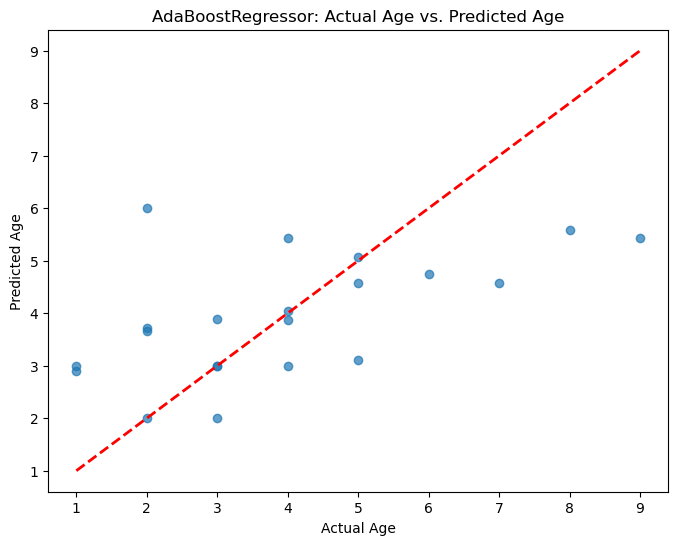

In [8]:
# Plotting the predicted values against the actual target values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("AdaBoostRegressor: Actual Age vs. Predicted Age")
plt.show()

### XGBoost

XGBoost is a powerful machine learning algorithm based on gradient boosting, known for its high performance, regularization techniques, and feature importance analysis. It combines weak learners sequentially and utilizes parallel processing to handle large datasets efficiently, making it a popular choice for structured data problems in competitions and real-world applications.

Mean Squared Error: 2.773490189490423


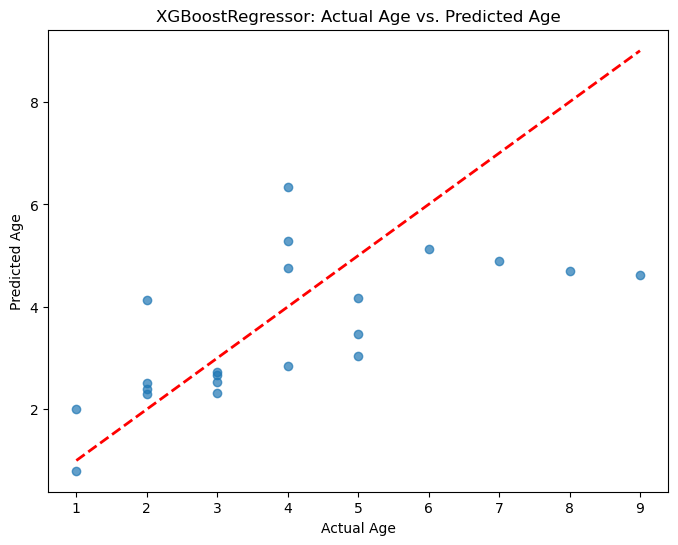

In [9]:
# Creating an XGBoostRegressor model with 50 base estimators (weak learners)
# The random_state is set to 42 for reproducibility
xgboost_model = xgb.XGBRegressor(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Training the XGBoost model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgboost_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the predicted values against the actual target values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("XGBoostRegressor: Actual Age vs. Predicted Age")
plt.show()

### CatBoost

CatBoost is a powerful open-source gradient boosting library designed to handle categorical features in tabular datasets without the need for explicit preprocessing. It offers fast training, robustness to overfitting, and built-in support for GPU and CPU acceleration, making it popular for various machine learning competitions and real-world applications.

/Users/iremkurt/anaconda3/envs/slit/lib/python3.8/site-packages/catboost/core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.313765
0:	learn: 1.6799335	total: 58.5ms	remaining: 2.87s
1:	learn: 1.6199517	total: 59.1ms	remaining: 1.42s
2:	learn: 1.5509961	total: 59.7ms	remaining: 935ms
3:	learn: 1.4704392	total: 60.2ms	remaining: 692ms
4:	learn: 1.3897272	total: 60.8ms	remaining: 547ms
5:	learn: 1.2829365	total: 62.6ms	remaining: 459ms
6:	learn: 1.2145083	total: 63.2ms	remaining: 388ms
7:	learn: 1.1594337	total: 63.8ms	remaining: 335ms
8:	learn: 1.1066130	total: 64.3ms	remaining: 293ms
9:	learn: 1.0450357	total: 64.9ms	remaining: 259ms
10:	learn: 0.9982159	total: 65.3ms	remaining: 231ms
11:	learn: 0.9381492	total: 65.9ms	remaining: 209ms
12:	learn: 0.8863781	total: 66.5ms	remaining: 189ms
13:	learn: 0.8434390	total: 67ms	remaining: 172ms
14:	learn: 0.8124987	total: 67.6ms	remaining: 158ms
15:	learn: 0.7898212	total: 68.1ms	remaining: 145ms
16:	learn: 0.7686378	total: 68.7ms	remaining: 133ms
17:	learn: 0.7456481	total: 69.3ms	remaining: 123ms
18:	learn: 0.7386304	total: 69.9ms	remaining: 

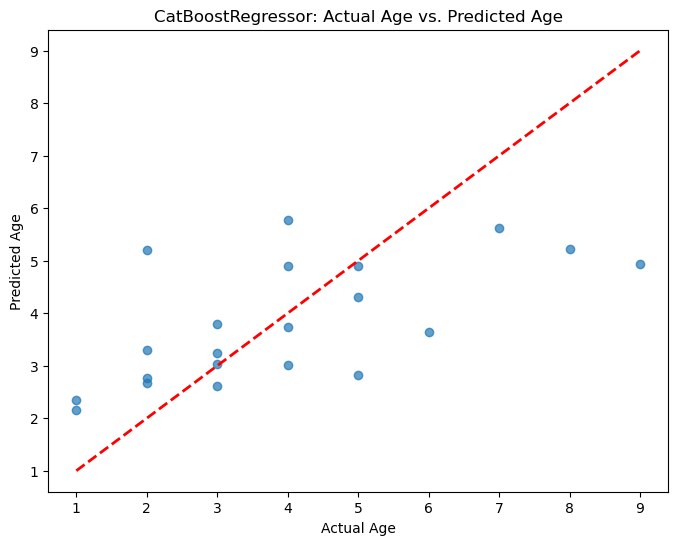

In [10]:
# Creating a CatBoostRegressor model with 50 base estimators (weak learners)
# The random_state is set to 42 for reproducibility
catboost_model = cb.CatBoostRegressor(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Training the CatBoost model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = catboost_model.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting the predicted values against the actual target values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("CatBoostRegressor: Actual Age vs. Predicted Age")
plt.show()